# Trading View Extract

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('BINANCE_SOLUSDT.P, 60_e652a.csv')

# Dropping rows
drop_columns = ['Plot','Plot.1']
df = df.drop(columns=drop_columns)

nan_columns = ['Leading Span A', 'Leading Span B']
df = df.dropna(subset=nan_columns, how='all')

# Display the first few rows of the DataFrame
df

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
50,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966
51,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169
52,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752
53,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752
54,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752
...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585


# Snipet Visualization

In [2]:
df_tail = df.tail(200)
df_tail

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
25776,1733788800,216.66,221.02,213.58,217.74,237.3525,238.610,NaN,226.020359
25777,1733792400,217.75,219.42,215.80,218.94,236.4425,238.450,NaN,226.020359
25778,1733796000,218.94,218.97,212.84,212.92,235.8375,237.845,NaN,226.020359
25779,1733799600,212.91,215.86,206.95,215.83,235.4975,237.505,NaN,226.020359
25780,1733803200,215.83,216.43,212.20,216.14,235.1125,237.120,NaN,226.020359
...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.280,216.687782,NaN
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.280,216.687782,NaN
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.280,NaN,226.664539
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.280,NaN,224.803585


/tmp/ipykernel_324971/1631992749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tail['time'] = pd.to_datetime(df_tail['time'], unit='s')  # Convert Unix timestamp to datetime


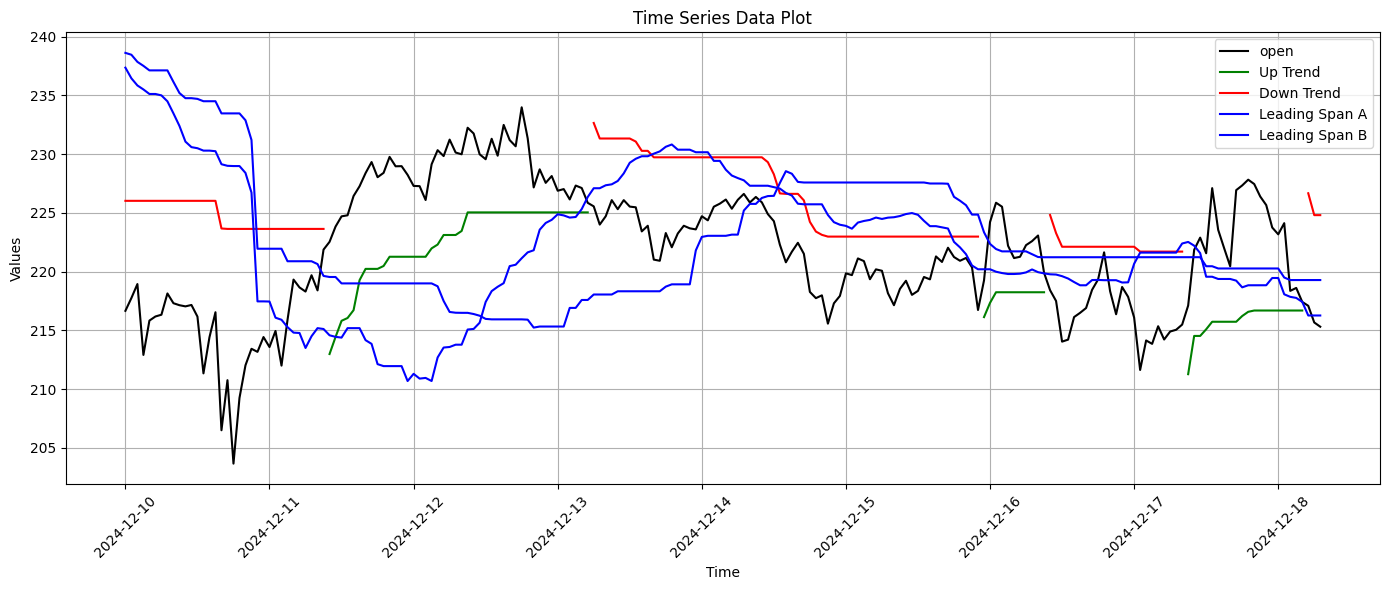

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_tail is a pandas DataFrame
df_tail['time'] = pd.to_datetime(df_tail['time'], unit='s')  # Convert Unix timestamp to datetime

# Define custom colors for specific series
color_map = {
    'open': 'black',
    'Up Trend': 'green',
    'Down Trend': 'red',
    'Leading Span A': 'blue',
    'Leading Span B': 'blue'
}

# Plotting all columns except 'high' and 'low'
plt.figure(figsize=(14, 6))

for column in ['open', 'Up Trend', 'Down Trend', 'Leading Span A', 'Leading Span B']:
    if column in color_map:
        plt.plot(df_tail['time'], df_tail[column], label=column, color=color_map[column])
    else:
        plt.plot(df_tail['time'], df_tail[column], label=column)  # Default color for other series

plt.title('Time Series Data Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df_head = df.head(200)
df_head

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
50,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966
51,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169
52,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752
53,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752
54,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752
...,...,...,...,...,...,...,...,...,...
245,1641877200,136.55,136.59,135.01,135.63,141.9675,140.435,NaN,140.062012
246,1641880800,135.62,136.75,135.40,136.72,141.5350,140.435,NaN,140.062012
247,1641884400,136.72,137.32,136.20,137.20,141.4375,140.435,NaN,140.062012
248,1641888000,137.21,138.38,136.08,136.41,141.4975,140.435,NaN,140.062012


/tmp/ipykernel_324971/2973937375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['time'] = pd.to_datetime(df_head['time'], unit='s')  # Convert Unix timestamp to datetime


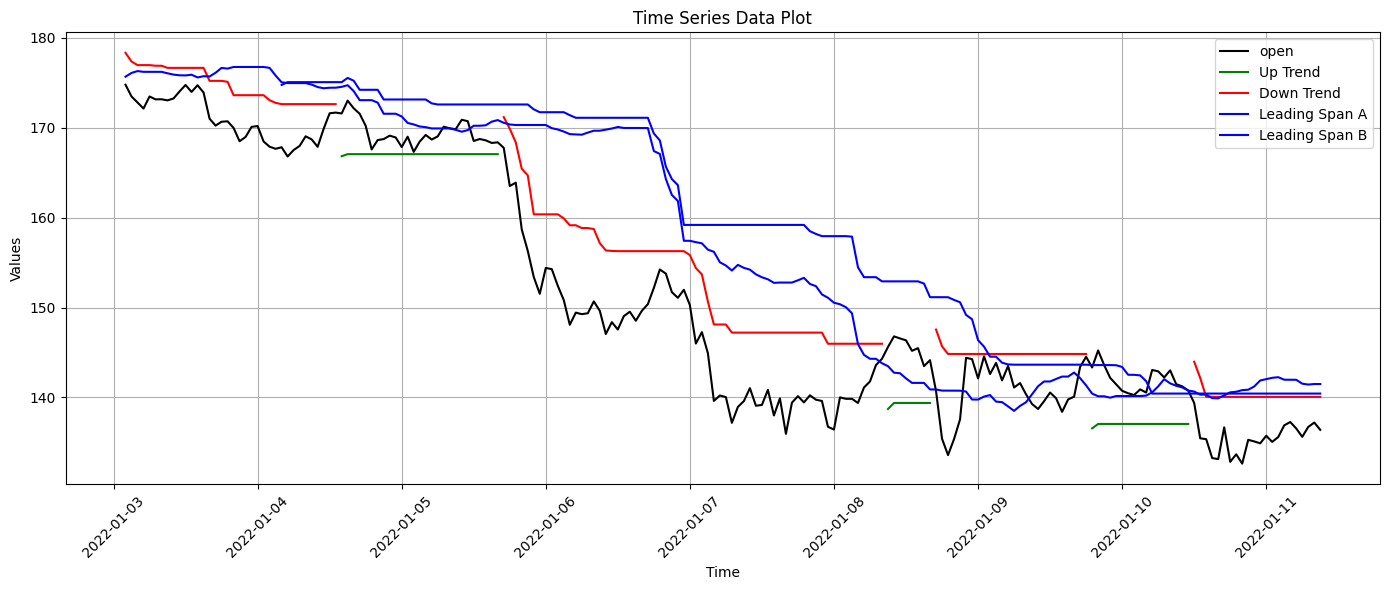

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_tail is a pandas DataFrame
df_head['time'] = pd.to_datetime(df_head['time'], unit='s')  # Convert Unix timestamp to datetime

# Define custom colors for specific series
color_map = {
    'open': 'black',
    'Up Trend': 'green',
    'Down Trend': 'red',
    'Leading Span A': 'blue',
    'Leading Span B': 'blue'
}

# Plotting all columns except 'high' and 'low'
plt.figure(figsize=(14, 6))

for column in ['open', 'Up Trend', 'Down Trend', 'Leading Span A', 'Leading Span B']:
    if column in color_map:
        plt.plot(df_head['time'], df_head[column], label=column, color=color_map[column])
    else:
        plt.plot(df_head['time'], df_head[column], label=column)  # Default color for other series

plt.title('Time Series Data Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Backtest Stats

In [12]:
df_backtest = df.copy()
df_backtest.reset_index(drop=True,inplace=True)
df_backtest

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
0,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966
1,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169
2,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752
3,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752
4,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752
...,...,...,...,...,...,...,...,...,...
25921,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN
25922,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN
25923,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539
25924,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585


In [13]:
import numpy as np

# Set 'super_trend' to 1 if 'Down Trend' is NaN, and to 0 if 'Up Trend' is NaN
df_backtest['super_trend'] = np.where(df_backtest['Down Trend'].isna(), 1, 
                                      np.where(df_backtest['Up Trend'].isna(), -1, np.nan))

# Define a function to determine the action suggestion for each row
def determine_criteria_pass(row):
    if row['super_trend'] == 1 and row['open'] > max(row['Leading Span A'], row['Leading Span B']):
        return 1
    elif row['super_trend'] == -1 and row['open'] < min(row['Leading Span A'], row['Leading Span B']):
        return 1
    return 0

# Apply the function row-wise to the DataFrame
df_backtest['criteria'] = df_backtest.apply(determine_criteria_pass, axis=1)

# Initialize 'action' column to None
df_backtest['action'] = None

# Assign 'long' where super_trend == 1 and criteria == 1
df_backtest['action'] = np.where(
    (df_backtest['super_trend'] == 1) & (df_backtest['criteria'] == 1),
    'long',
    df_backtest['action']
)

# Assign 'short' where super_trend == -1 and criteria == 1
df_backtest['action'] = np.where(
    (df_backtest['super_trend'] == -1) & (df_backtest['criteria'] == 1),
    'short',
    df_backtest['action']
)

# Assign 'close' where super_trend changes (shifted value not equal to current value)
df_backtest['trend_change'] = np.where(
    df_backtest['super_trend'].shift(1) != df_backtest['super_trend'],
    1,
    0
)

df_backtest

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend,super_trend,criteria,action,trend_change
0,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966,-1.0,1,short,1
1,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169,-1.0,1,short,0
2,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752,-1.0,1,short,0
3,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752,-1.0,1,short,0
4,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752,-1.0,1,short,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25921,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN,1.0,0,None,0
25922,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN,1.0,0,None,0
25923,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539,-1.0,0,None,1
25924,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585,-1.0,1,short,0


In [27]:
# Get the backtest trade history
df_action_close = df_backtest[df_backtest['trend_change'] == 1]

# Generate consecutive row index pairs
index_list = df_action_close.index.tolist()
consecutive_pairs = [(index_list[i], index_list[i + 1]) for i in range(len(index_list) - 1)]

consecutive_pairs

# Create a function to process each pair
def process_consecutive_pairs(df_backtest, consecutive_pairs):
    result_pairs = []

    for start_idx, end_idx in consecutive_pairs:
        # Slice the dataframe between the two indices (inclusive)
        sub_df = df_backtest.iloc[start_idx:end_idx+1]
        
        # Check if there is any "short" or "long" action in the 'action' column
        actions = sub_df['action']
        long_short_indices = actions[actions.isin(['long', 'short'])]

        if not long_short_indices.empty:
            # Note the first occurrence nearest to the first index of the pair
            first_action_idx = long_short_indices.index[0]
            # Add the result as a tuple (first action index, second close index)
            result_pairs.append((first_action_idx, end_idx))

    return result_pairs

# Call the function with your DataFrame and consecutive_pairs
result = process_consecutive_pairs(df_backtest, consecutive_pairs)

# Function to drop pairs where both indices are the same
def remove_duplicate_indices(pairs):
    return [(start_idx, end_idx) for start_idx, end_idx in pairs if start_idx != end_idx]

# Apply the function to the result list
filtered_result = remove_duplicate_indices(result)

# Create the result DataFrame
results = []
for start_idx, end_idx in filtered_result:
    position = df_backtest.loc[start_idx, 'action']
    open_time = df_backtest.loc[start_idx, 'time']
    open_price = df_backtest.loc[start_idx, 'open']
    exit_time = df_backtest.loc[end_idx, 'time']
    exit_price = df_backtest.loc[end_idx, 'open']
    results.append({
        "position": position,
        "open_time": open_time,
        "open_price": open_price,
        "exit_time": exit_time,
        "exit_price": exit_price
    })

backtest_trade_recap = pd.DataFrame(results)

backtest_trade_recap

,position,open_time,open_price,exit_time,exit_price
0,short,1641175200,174.80,1641304800,171.60
1,short,1641402000,167.78,1641632400,145.62
2,short,1641661200,140.73,1641754800,143.34
3,long,1641758400,145.23,1641816000,139.39
4,short,1641816000,139.39,1641916800,137.06
...,...,...,...,...,...
488,long,1733911200,222.53,1734069600,225.55
489,short,1734170400,225.89,1734303600,219.25
490,long,1734307200,224.21,1734343200,218.42
491,short,1734343200,218.42,1734426000,217.11


# Back Test Simulation

In [52]:
# Calculate trade simulation
backtest_trade_sim = backtest_trade_recap.copy()

backtest_trade_sim['balance'] = 1000
backtest_trade_sim['open_fee'] = 0
backtest_trade_sim['exit_fee'] = 0
backtest_trade_sim['realized_pnl'] = 0

# Define the taker fee (e.g., 0.001 for 0.1%)
# taker_fee = 0.0005 # 0.05% futures
taker_fee = 0.001 # 0.1% spot

# Calculate open_fee
backtest_trade_sim['open_fee'] = backtest_trade_sim['balance'] * taker_fee

# Calculate exit_fee
backtest_trade_sim['exit_fee'] = (
    (backtest_trade_sim['balance'] / backtest_trade_sim['open_price']) * 
    backtest_trade_sim['exit_price'] * taker_fee
)

# Calculate realized_pnl
def calculate_realized_pnl(row):
    position = row['position']
    balance = row['balance']
    open_price = row['open_price']
    exit_price = row['exit_price']
    open_fee = row['open_fee']
    exit_fee = row['exit_fee']
    
    if position == 'short':
        return balance - (balance / open_price * exit_price) - open_fee - exit_fee
    elif position == 'long':
        return (balance / open_price * exit_price) - balance - open_fee - exit_fee
    return 0  # Default case, should not be reached

backtest_trade_sim['realized_pnl'] = backtest_trade_sim.apply(calculate_realized_pnl, axis=1)

# Calculate cumulative realized profit and loss
backtest_trade_sim['cumulative_realized_pnl'] = backtest_trade_sim['realized_pnl'].cumsum()

# Display the updated DataFrame
backtest_trade_sim

,position,open_time,open_price,exit_time,exit_price,balance,open_fee,exit_fee,realized_pnl,cumulative_realized_pnl
0,short,1641175200,174.80,1641304800,171.60,1000,1.0,0.981693,16.324943,16.324943
1,short,1641402000,167.78,1641632400,145.62,1000,1.0,0.867922,130.209799,146.534741
2,short,1641661200,140.73,1641754800,143.34,1000,1.0,1.018546,-20.564698,125.970043
3,long,1641758400,145.23,1641816000,139.39,1000,1.0,0.959788,-42.171865,83.798178
4,short,1641816000,139.39,1641916800,137.06,1000,1.0,0.983284,14.732405,98.530583
...,...,...,...,...,...,...,...,...,...,...
488,long,1733911200,222.53,1734069600,225.55,1000,1.0,1.013571,11.557633,12953.701143
489,short,1734170400,225.89,1734303600,219.25,1000,1.0,0.970605,27.424233,12981.125376
490,long,1734307200,224.21,1734343200,218.42,1000,1.0,0.974176,-27.798180,12953.327196
491,short,1734343200,218.42,1734426000,217.11,1000,1.0,0.994002,4.003617,12957.330812


In [53]:
import pandas as pd

# Count of positions (number and percentage)
position_counts = backtest_trade_sim['position'].value_counts()
position_percentages = position_counts / len(backtest_trade_sim) * 100

# Realized PnL statistics
realized_pnl_stats = {
    'max': backtest_trade_sim['realized_pnl'].max(),
    'min': backtest_trade_sim['realized_pnl'].min(),
    'avg': backtest_trade_sim['realized_pnl'].mean(),
    'median': backtest_trade_sim['realized_pnl'].median(),
}

# Win rate (overall)
total_trades = len(backtest_trade_sim)
wins = (backtest_trade_sim['realized_pnl'] >= 0).sum()
win_rate = wins / total_trades * 100

# Win rate per position (long/short)
win_rate_by_position = (
    backtest_trade_sim.groupby('position')['realized_pnl']
    .apply(lambda x: (x >= 0).sum() / len(x) * 100)
)

# Results
results = {
    "Position Counts": position_counts.to_dict(),
    "Position Percentages": position_percentages.to_dict(),
    "Realized PnL Stats": realized_pnl_stats,
    "Overall Win Rate": win_rate,
    "Win Rate by Position": win_rate_by_position.to_dict(),
}

# Display results
results

{'Position Counts': {'long': 249, 'short': 244},
 'Position Percentages': {'long': 50.50709939148072,
  'short': 49.49290060851927},
 'Realized PnL Stats': {'max': np.float64(590.4183985330072),
  'min': np.float64(-130.93114740368495),
  'avg': np.float64(26.22583170334336),
  'median': np.float64(3.4844938560561767)},
 'Overall Win Rate': np.float64(52.53549695740365),
 'Win Rate by Position': {'long': 50.602409638554214,
  'short': 54.50819672131148}}

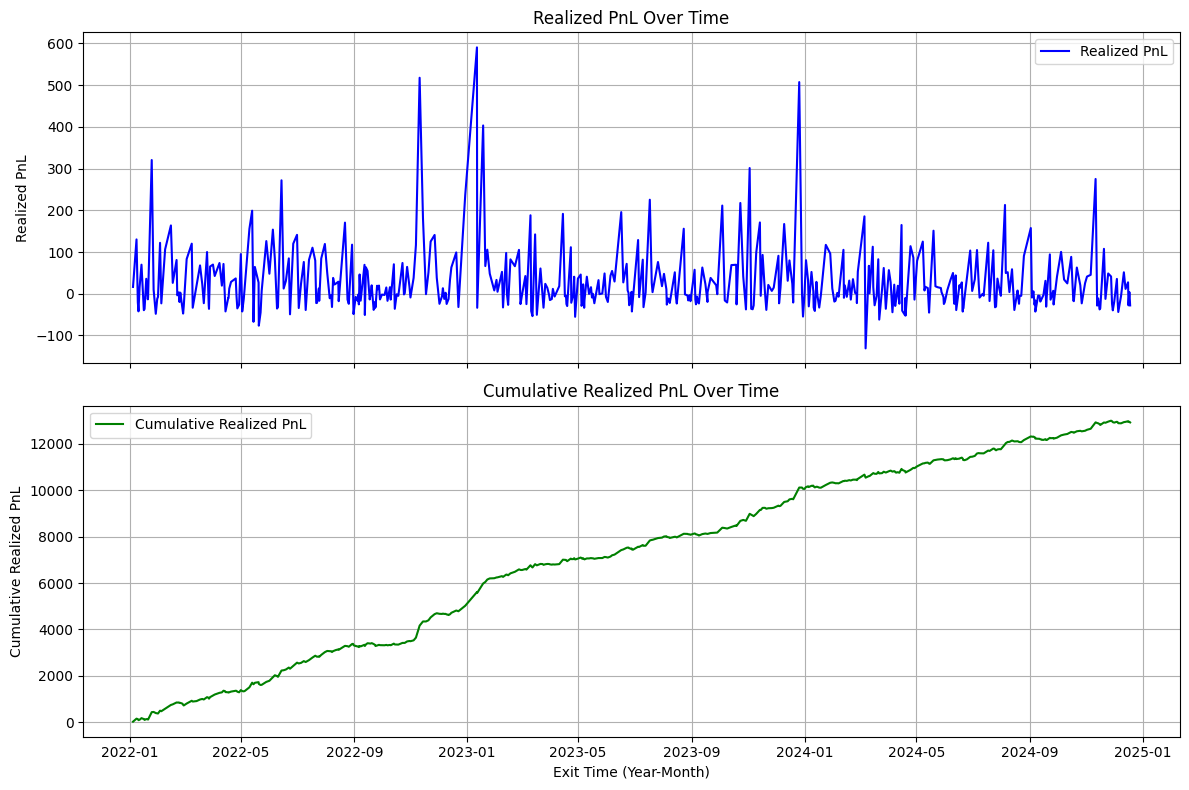

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert exit_time from UNIX milliseconds to UTC+0 datetime
backtest_trade_sim['exit_time_utc'] = pd.to_datetime(
    backtest_trade_sim['exit_time'], unit='s', utc=True
)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Realized PnL vs Exit Time
ax[0].plot(backtest_trade_sim['exit_time_utc'], backtest_trade_sim['realized_pnl'], label='Realized PnL', color='blue')
ax[0].set_title('Realized PnL Over Time')
ax[0].set_ylabel('Realized PnL')

# Cumulative Realized PnL vs Exit Time
ax[1].plot(backtest_trade_sim['exit_time_utc'], backtest_trade_sim['cumulative_realized_pnl'], label='Cumulative Realized PnL', color='green')
ax[1].set_title('Cumulative Realized PnL Over Time')
ax[1].set_ylabel('Cumulative Realized PnL')

# Format x-axis to show year and month
ax[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
ax[1].set_xlabel('Exit Time (Year-Month)')

# Improve layout and add gridlines
for axis in ax:
    axis.grid(True)
    axis.legend()

plt.tight_layout()
plt.show()